<a href="https://colab.research.google.com/github/R-it-a/Estrutura-de-dados/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
import numpy as np

import pandas as pd
!pip install swifter
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.3 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=d4efb7eb4c9679cdc27f57b08a25c819c5684643d3871e3d282aa0b633e8db12
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter


# filtragem dos dados

In [ ]:
import pandas as pd

educacao = pd.read_csv(
    '/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv',
    error_bad_lines=False,
    sep = ";",
    encoding = 'ISO-8859-1',
    usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA"]
)


<ipython-input-2-22bd40da0e3b>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  educacao = pd.read_csv(


In [ ]:
educacao

,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,F,2,NaN,NaN,NaN,NaN
1,M,3,604.1,661.7,595.3,711.3
2,F,3,NaN,NaN,NaN,NaN
3,M,3,620.8,675.0,624.2,759.4
4,F,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5783104,F,1,508.3,661.4,658.3,725.7
5783105,M,1,570.5,646.1,607.2,719.5
5783106,F,1,418.8,597.5,674.5,648.1
5783107,F,1,NaN,NaN,NaN,NaN


# Fim da filtragen

In [ ]:
import seaborn as sn

import swifter
def my_func(row):
    if row['TP_COR_RACA'] == 0:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 2:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 3:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 4:
        val = 'nao_branco'
    else:
        val = 'branco' == 5;
    return val

educacao['cor_bool'] = educacao.swifter.apply(my_func, axis=1)
educacao.head()


Pandas Apply:   0%|          | 0/5783109 [00:00<?, ?it/s]

,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,cor_bool
0,F,2,NaN,NaN,NaN,NaN,nao_branco
1,M,3,604.1,661.7,595.3,711.3,nao_branco
2,F,3,NaN,NaN,NaN,NaN,nao_branco
3,M,3,620.8,675.0,624.2,759.4,nao_branco
4,F,3,NaN,NaN,NaN,NaN,nao_branco


In [ ]:
#trata os NaNs
educacao.fillna(0, inplace=True)


In [ ]:
import pandas as pd

# Transforma a variável TP_SEXO em binária
educacao = pd.get_dummies(educacao, columns=['TP_SEXO'])

# Cria os 4 grupos
grupos = educacao.groupby(['TP_SEXO_F', 'cor_bool'])['NU_NOTA_MT'].agg('mean')


In [ ]:
from sklearn.model_selection import train_test_split

# Separando as features (X) e target (y)
X = educacao.drop(['NU_NOTA_MT'], axis=1)
y = educacao['NU_NOTA_MT']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split

# separar as features das variáveis de resposta
X = educacao.drop('NU_NOTA_MT', axis=1)
y = educacao['NU_NOTA_MT']

# separar em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
educacao = educacao.replace(r'^\s*$', np.nan, regex=True)

data = educacao[["cor_bool", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT"]]
predict = "NU_NOTA_MT"
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras

# Lê os dados
educacao = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv',
                       error_bad_lines=False,
                       sep=';',
                       encoding='ISO-8859-1',
                       usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA"])

# Converte a coluna TP_COR_RACA em valores binários
def my_func(row):
    if row['TP_COR_RACA'] == 0:
        val = '1'
    elif row['TP_COR_RACA']  == 2:
        val = '1'
    elif row['TP_COR_RACA']  == 3:
        val = '1'
    elif row['TP_COR_RACA']  == 4:
        val = '1'
    else:
        val = '0'
    return val

educacao['cor_bool'] = educacao.swifter.apply(my_func, axis=1)

# Separa as variáveis dependentes das independentes
X = educacao.drop(['NU_NOTA_MT'], axis=1)
y = educacao['NU_NOTA_MT']

# Codifica as variáveis categóricas em valores numéricos
encoder = LabelEncoder()
X['TP_SEXO'] = encoder.fit_transform(X['TP_SEXO'])
X['cor_bool'] = encoder.fit_transform(X['cor_bool'])

# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Normaliza os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a arquitetura da rede neural
model = keras.Sequential([
    keras.layers.Dense(16, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

# Compila o modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Treina o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Avalia o modelo
score = model.evaluate(X_test, y_test)
print('Test loss:', score)

# Faz previsões com o modelo treinado
y_pred = model.predict(X_test)


In [ ]:
from sklearn.model_selection import train_test_split

X = educacao.drop(['NU_NOTA_MT'], axis=1)
y = educacao['NU_NOTA_MT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# carrega o dataset
educacao = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA'])

# cria a variável dummy para a cor do aluno
def my_func(row):
    if row['TP_COR_RACA'] == 0:
        val = '1'
    elif row['TP_COR_RACA']  == 2:
        val = '1'
    elif row['TP_COR_RACA']  == 3:
        val = '1'
    elif row['TP_COR_RACA']  == 4:
        val = '1'
    else:
        val = '0'
    return val

educacao['cor_bool'] = educacao.apply(my_func, axis=1)

# cria a variável dummy para o sexo do aluno
sexo_dummies = pd.get_dummies(educacao['TP_SEXO'], prefix='sexo', drop_first=True)

# combina as variáveis dummy com o dataframe original
educacao = pd.concat([educacao, sexo_dummies], axis=1)

# define as variáveis de entrada (notas, cor e sexo) e a variável de saída (nota de matemática)
X = educacao[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'cor_bool', 'sexo_M']]
y = educacao['NU_NOTA_MT']

# divide os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# aplica a transformação de padronização às variáveis de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# cria a rede neural
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# compila o modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# treina o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# avalia o modelo no conjunto de teste
score = model.evaluate(X_test, y_test)

# faz as previsões no conjunto de teste
y_pred = model.predict(X_test)


Epoch 1/10
115663/115663 [==============================] - 263s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/10
 11603/115663 [==>...........................] - ETA: 3:20 - loss: nan - mae: nan

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Carrega o arquivo de dados
df = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv', error_bad_lines=False, sep=";", encoding='ISO-8859-1', usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA"])

# Remove as linhas com valores nulos
df.dropna(inplace=True)

# Cria uma coluna com as raças
def my_func(row):
    if row['TP_COR_RACA'] == 0:
        val = 'nao_branco'
    elif row['TP_COR_RACA'] == 2:
        val = 'nao_branco'
    elif row['TP_COR_RACA'] == 3:
        val = 'nao_branco'
    elif row['TP_COR_RACA'] == 4:
        val = 'nao_branco'
    else:
        val = 'branco'
    return val

df['cor_bool'] = df.apply(my_func, axis=1)

# Transforma as variáveis categóricas em variáveis numéricas
df = pd.get_dummies(df, columns=["TP_SEXO", "cor_bool"])

# Separa as variáveis independentes da variável dependente
X = df.drop(columns=["NU_NOTA_MT"])
y = df[["NU_NOTA_MT"]]

# Separa os dados em conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treina o modelo de regressão linear
reg = LinearRegression()
reg.fit(X_train, y_train)

# Faz a previsão das notas para o conjunto de teste
y_pred = reg.predict(X_test)

# Calcula o erro RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Cria um dataframe com as previsões e as notas reais
test_df = X_test.copy()
test_df['NU_NOTA_MT'] = y_test.values
test_df['NU_NOTA_MT_pred'] = y_pred

# Agrupa as previsões por gênero e cor
grouped = test_df.groupby(["TP_SEXO_F", "TP_SEXO_M", "cor_bool_branco", "cor_bool_nao_branco"]).mean().reset_index()

# Plota gráfico das previsões para mulheres não brancas
#plt.figure(figsize=(8,6))
#plt.plot(grouped[grouped["TP_SEXO_F"]==1][grouped["cor_bool_branco"]==0]["NU_NOTA_MT"], label="Notas reais")
#plt.plot(grouped[grouped["TP_SEXO_F"]==1][grouped["cor_bool_branco"]==0]["NU_NOTA_MT_pred"], label="Previsão")
#plt.title("Previsão de notas para mulheres não brancas")
#plt.xlabel


RMSE: 76.6945538050756


In [ ]:
import seaborn as sns

# Separar os grupos
def my_func(row):
    if row['TP_COR_RACA'] == 0:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 2:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 3:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 4:
        val = 'nao_branco'
    else:
        val = 'branco'
    return val

educacao['cor_bool'] = educacao.apply(my_func, axis=1)


# Filtrar os grupos de interesse
mulheres_nao_branco = educacao[(educacao['cor_bool'] == 'nao_branco') & (educacao['TP_SEXO'] == 'F')]
mulheres_branco = educacao[(educacao['cor_bool'] == 'branco') & (educacao['TP_SEXO'] == 'F')]
homens_nao_branco = educacao[(educacao['cor_bool'] == 'nao_branco') & (educacao['TP_SEXO'] == 'M')]
homens_branco = educacao[(educacao['cor_bool'] == 'branco') & (educacao['TP_SEXO'] == 'M')]



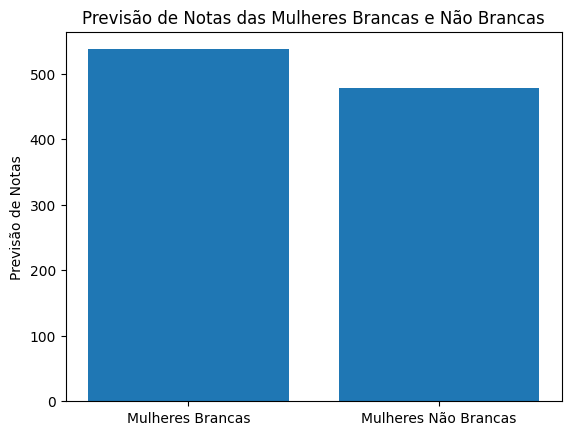

In [ ]:
# Filtra apenas os dados das mulheres brancas e não brancas
women_white = grouped[(grouped['TP_SEXO_F'] == 1) & (grouped['cor_bool_branco'] == 1)]
women_nonwhite = grouped[(grouped['TP_SEXO_F'] == 1) & (grouped['cor_bool_nao_branco'] == 1)]

# Cria as listas de valores para plotagem
labels = ['Mulheres Brancas', 'Mulheres Não Brancas']
x = np.arange(len(labels))
y1 = [women_white['NU_NOTA_MT_pred'].values[0], women_nonwhite['NU_NOTA_MT_pred'].values[0]]

# Plota o gráfico de barras
plt.bar(x, y1)
plt.xticks(x, labels)
plt.ylabel('Previsão de Notas')
plt.title('Previsão de Notas das Mulheres Brancas e Não Brancas')
plt.show()


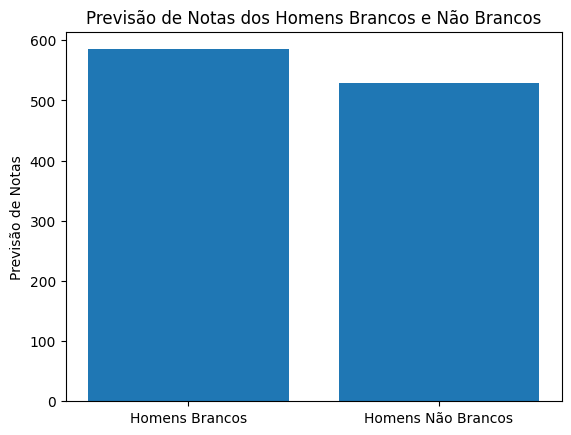

In [ ]:
# Filtra apenas os dados dos homens brancos e não brancos
men_white = grouped[(grouped['TP_SEXO_M'] == 1) & (grouped['cor_bool_branco'] == 1)]
men_nonwhite = grouped[(grouped['TP_SEXO_M'] == 1) & (grouped['cor_bool_nao_branco'] == 1)]

# Cria as listas de valores para plotagem
labels = ['Homens Brancos', 'Homens Não Brancos']
x = np.arange(len(labels))
y2 = [men_white['NU_NOTA_MT_pred'].values[0], men_nonwhite['NU_NOTA_MT_pred'].values[0]]

# Plota o gráfico de barras
plt.bar(x, y2)
plt.xticks(x, labels)
plt.ylabel('Previsão de Notas')
plt.title('Previsão de Notas dos Homens Brancos e Não Brancos')
plt.show()


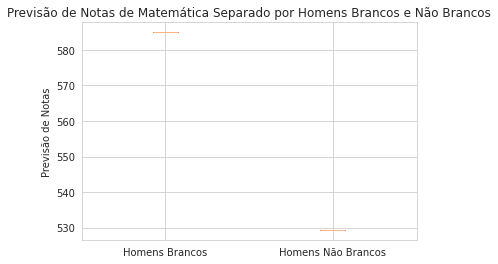

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filtra apenas os dados dos homens brancos e não brancos
men_white = grouped[(grouped['TP_SEXO_F'] == 0) & (grouped['cor_bool_branco'] == 1)]
men_nonwhite = grouped[(grouped['TP_SEXO_F'] == 0) & (grouped['cor_bool_nao_branco'] == 1)]

# Cria as listas de valores para plotagem
data = [men_white['NU_NOTA_MT_pred'].values, men_nonwhite['NU_NOTA_MT_pred'].values]
labels = ['Homens Brancos', 'Homens Não Brancos']

# Plota o boxplot
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(labels)
ax.set_ylabel('Previsão de Notas')
ax.set_title('Previsão de Notas de Matemática Separado por Homens Brancos e Não Brancos')

plt.show()


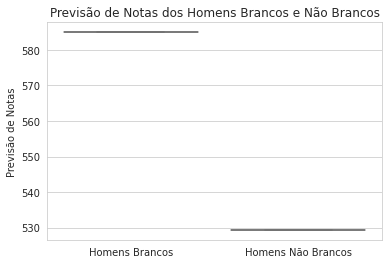

In [ ]:
import seaborn as sns

# Filtra apenas os dados dos homens brancos e não brancos
men_white = grouped[(grouped['TP_SEXO_F'] == 0) & (grouped['cor_bool_branco'] == 1)]
men_nonwhite = grouped[(grouped['TP_SEXO_F'] == 0) & (grouped['cor_bool_nao_branco'] == 1)]

# Cria um dataframe para plotagem dos boxplots
data = {'Homens Brancos': men_white['NU_NOTA_MT_pred'],
        'Homens Não Brancos': men_nonwhite['NU_NOTA_MT_pred']}
df = pd.DataFrame(data)

# Plota os boxplots
sns.boxplot(data=df)
plt.ylabel('Previsão de Notas')
plt.title('Previsão de Notas dos Homens Brancos e Não Brancos')
plt.show()


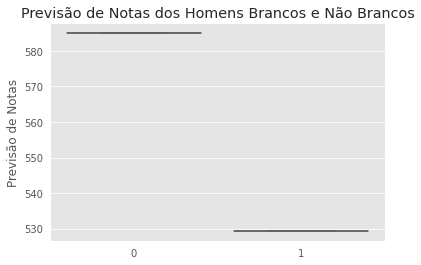

In [ ]:
# Filtra apenas os dados das mulheres brancas e não brancas
women_white = grouped[(grouped['TP_SEXO_F'] == 1) & (grouped['cor_bool_branco'] == 1)]
women_nonwhite = grouped[(grouped['TP_SEXO_F'] == 1) & (grouped['cor_bool_nao_branco'] == 1)]

# Cria o boxplot
plt.style.use('ggplot')
sns.boxplot(data=educacao[(educacao['TP_SEXO'] == 'F') & (educacao['cor_bool_branco'] == 1) | (educacao['cor_bool_nao_branco'] == 1)],
            x='cor', y='NU_NOTA_MT', hue='cor_bool')

plt.title('Distribuição de notas de matemática das mulheres brancas e não brancas')
plt.xlabel('Cor')
plt.ylabel('Nota de matemática')
plt.show()


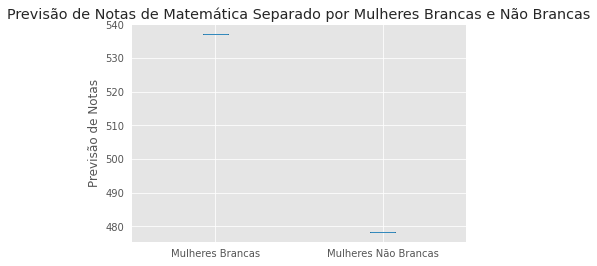

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filtra apenas os dados das mulheres brancas e não brancas
women_white = grouped[(grouped['TP_SEXO_F'] == 1) & (grouped['cor_bool_branco'] == 1)]
women_nonwhite = grouped[(grouped['TP_SEXO_F'] == 1) & (grouped['cor_bool_nao_branco'] == 1)]

# Cria as listas de valores para plotagem
data = [women_white['NU_NOTA_MT_pred'].values, women_nonwhite['NU_NOTA_MT_pred'].values]
labels = ['Mulheres Brancas', 'Mulheres Não Brancas']

# Plota o boxplot
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(labels)
ax.set_ylabel('Previsão de Notas')
ax.set_title('Previsão de Notas de Matemática Separado por Mulheres Brancas e Não Brancas')

plt.show()


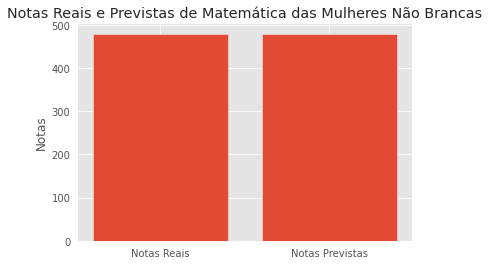

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra apenas os dados das mulheres não brancas
women_nonwhite = grouped[(grouped['TP_SEXO_F'] == 1) & (grouped['cor_bool_nao_branco'] == 1)]

# Cria as listas de valores para plotagem
labels = ['Notas Reais', 'Notas Previstas']
x = np.arange(len(labels))
y1 = [women_nonwhite['NU_NOTA_MT'].values[0], women_nonwhite['NU_NOTA_MT_pred'].values[0]]

# Plota o gráfico de barras
plt.bar(x, y1)
plt.xticks(x, labels)
plt.ylabel('Notas')
plt.title('Notas Reais e Previstas de Matemática das Mulheres Não Brancas')
plt.show()


In [ ]:
# Homens brancos
men_white = educacao[(educacao['TP_SEXO'] == 'M') & (educacao['cor_bool'] == 'branco')]

# Homens não brancos
men_nonwhite = educacao[(educacao['TP_SEXO'] == 'M') & (educacao['cor_bool'] == 'nao_branco')]

# Mulheres brancas
women_white = educacao[(educacao['TP_SEXO'] == 'F') & (educacao['cor_bool'] == 'branco')]

# Mulheres não brancas
women_nonwhite = educacao[(educacao['TP_SEXO'] == 'F') & (educacao['cor_bool'] == 'nao_branco')]


In [ ]:
from sklearn.linear_model import LinearRegression

# Homens brancos
men_white_X = men_white[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']]
men_white_y = men_white['NU_NOTA_MT']

# Homens não brancos
men_nonwhite_X = men_nonwhite[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']]
men_nonwhite_y = men_nonwhite['NU_NOTA_MT']

# Mulheres brancas
women_white_X = women_white[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']]
women_white_y = women_white['NU_NOTA_MT']

# Mulheres não brancas
women_nonwhite_X = women_nonwhite[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']]
women_nonwhite_y = women_nonwhite['NU_NOTA_MT']


In [ ]:
import pandas as pd

# Carrega a base de dados
educacao = pd.re                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ad_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv',
                        sep=';', encoding='ISO-8859-1',
                        usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA"])

# Cria uma coluna 'cor_bool' para identificar se é branco ou não
def categoriza_cor(row):
    if row['TP_COR_RACA'] == 0:
        return 'nao_branco'
    elif row['TP_COR_RACA'] == 2:
        return 'nao_branco'
    elif row['TP_COR_RACA'] == 3:
        return 'nao_branco'
    elif row['TP_COR_RACA'] == 4:
        return 'nao_branco'
    else:
        return 'branco'

educacao['cor_bool'] = educacao.apply(categoriza_cor, axis=1)

# Separação por gênero e raça
mulheres_brancas = educacao[(educacao['TP_SEXO'] == 'F') & (educacao['cor_bool'] == 'branco')]
mulheres_nao_brancas = educacao[(educacao['TP_SEXO'] == 'F') & (educacao['cor_bool'] == 'nao_branco')]
homens_brancos = educacao[(educacao['TP_SEXO'] == 'M') & (educacao['cor_bool'] == 'branco')]
homens_nao_brancos = educacao[(educacao['TP_SEXO'] == 'M') & (educacao['cor_bool'] == 'nao_branco')]


In [ ]:
from sklearn.model_selection import train_test_split

# Definindo as variáveis preditoras e a variável alvo
X = educacao.drop(['NU_NOTA_MT'], axis=1)
y = educacao['NU_NOTA_MT']

# Dividindo em conjunto de treino e teste (70% para treino e 30% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Leitura dos dados
educacao = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv', sep=';', encoding='ISO-8859-1', usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA"])

categorical_cols = ['TP_COR_RACA', 'TP_SEXO']


# Criando coluna com informação sobre a raça
def my_func(row):
    if row['TP_COR_RACA'] == 0:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 2:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 3:
        val = 'nao_branco'
    elif row['TP_COR_RACA']  == 4:
        val = 'nao_branco'
    else:
        val = 'branco' == 5;
    return val

educacao['cor_bool'] = educacao.apply(my_func, axis=1)

# Separando os dados por sexo e cor/raça
df_ww = educacao.loc[(educacao['TP_SEXO'] == 'F') & (educacao['cor_bool'] == 'branco')]
df_nww = educacao.loc[(educacao['TP_SEXO'] == 'F') & (educacao['cor_bool'] == 'nao_branco')]
df_mw = educacao.loc[(educacao['TP_SEXO'] == 'M') & (educacao['cor_bool'] == 'branco')]
df_nmw = educacao.loc[(educacao['TP_SEXO'] == 'M') & (educacao['cor_bool'] == 'nao_branco')]

# Separando em variáveis dependentes e independentes
X_ww = df_ww.drop(['NU_NOTA_MT'], axis=1)
y_ww = df_ww['NU_NOTA_MT']
X_nww = df_nww.drop(['NU_NOTA_MT'], axis=1)
y_nww = df_nww['NU_NOTA_MT']
X_mw = df_mw.drop(['NU_NOTA_MT'], axis=1)
y_mw = df_mw['NU_NOTA_MT']
X_nmw = df_nmw.drop(['NU_NOTA_MT'], axis=1)
y_nmw = df_nmw['NU_NOTA_MT']

# Convertendo variável de sexo em dummies
X_ww = pd.get_dummies(X_ww, columns=['TP_SEXO'], drop_first=True)
X_nww = pd.get_dummies(X_nww, columns=['TP_SEXO'], drop_first=True)
X_mw = pd.get_dummies(X_mw, columns=['TP_SEXO'], drop_first=True)
X_nmw = pd.get_dummies(X_nmw, columns=['TP_SEXO'], drop_first=True)

# Tratando valores NaN
imputer = SimpleImputer(strategy='mean')
educacao.dropna(inplace=True)

# Convertendo variáveis categóricas em numéricas
educacao[categorical_cols] = educacao[categorical_cols].apply(lambda x: pd.factorize(x)[0])





In [ ]:
# Tratando valores NaN
imputer = SimpleImputer(strategy='mean')
educacao = educacao.dropna()

# Convertendo variáveis categóricas em numéricas
educacao[categorical_cols] = educacao[categorical_cols].apply(lambda x: pd.factorize(x)[0])

# Convertendo variáveis categóricas em dummies
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = pd.DataFrame(ohe.fit_transform(educacao[categorical_cols]))
encoded_cols.index = educacao.index
educacao = educacao.drop(categorical_cols, axis=1)
educacao = pd.concat([educacao, encoded_cols], axis=1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
